<a href="https://colab.research.google.com/github/Nagiev-programmer/my-practices/blob/main/%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_0_8_0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

Задача: Создать чат бота для получения информации об исследованиях космоса

Описание: Создайте комплексное приложение командной строки, которое будет использоваться в качестве панели управления исследованиями космоса. Данное приложение будет обращаться к https://api.nasa.gov/ для предоставления пользователям набора информации о космосе, включая:

- Астрономическая картинка дня (APOD): Отображение APOD с пояснениями к нему.
- Фотографии с марсохода: позволяет пользователям выбирать и фильтровать фотографии с марсохода по дате и типу камеры.
- Объекты, сближающиеся с Землей (ОСЗ): Поиск и отображение информации об объекте, сближающихся с Землей, на определенную дату, включая их размеры и потенциальную опасность.
- Данные о космической погоде: Отображают последние данные о космической погоде, включая солнечные вспышки и геомагнитные бури.
Приложение должно позволять пользователям ориентироваться в этих функциях, корректно обрабатывать ошибки и обеспечивать удобство работы.

Требования:
- Пользовательский ввод: Приложение должно предложить пользователю ввести данные, чтобы выбрать, какую функцию он хочет изучить.
- Проверка данных: Убедитесь, что пользовательские данные (например, даты) проверены.
- Обработка ошибок: Корректно обрабатывайте ошибки API и неверные ответы.
- Представление данных: Представляйте данные в четкой и организованной форме.
- Опция выхода: позволяет пользователям выходить из приложения в любое время.

In [ ]:
import requests
import json
from datetime import datetime

API_KEY = 'A5Cfiqp1wBhe9kcX2QXB2BhEh1YhpVrhUUr4XyXu'

class SpaceResearchBot:
    def __init__(self):
        self.base_url = "https://api.nasa.gov"

    def get_apod(self):
        url = f"{self.base_url}/planetary/apod"
        params = {'api_key': API_KEY}
        response = requests.get(url, params=params)

        if response.status_code == 200:
            data = response.json()
            print(f"\nАстрономическая картинка дня: {data['title']}")
            print(f"Описание: {data['explanation']}")
            print(f"Изображение: {data['url']}")
        else:
            print("Ошибка")

    def get_mars_photos(self, sol, camera_type=None):
        url = f"{self.base_url}/mars-photos/api/v1/rovers/curiosity/photos"
        params = {'sol': sol, 'api_key': API_KEY}
        if camera_type:
            params['camera'] = camera_type

        response = requests.get(url, params=params)

        if response.status_code == 200:
            data = response.json()
            photos = data.get("photos", [])
            if photos:
                for index, photo in enumerate(photos, 1):
                    print(f"\n{index}. Фото {photo['camera']['full_name']}")
                    print(f"Ссылка на изображение: {photo['img_src']}")
            else:
                print("Фотографий нету")
        else:
            print("Ошибка")

    def get_near_earth_objects(self, date):
        url = f"{self.base_url}/neo/rest/v1/feed"
        params = {'api_key': API_KEY, 'start_date': date, 'end_date': date}
        response = requests.get(url, params=params)

        if response.status_code == 200:
            data = response.json()
            if 'near_earth_objects' in data:
                objects = data['near_earth_objects'][date]
                for obj in objects:
                    print(f"\nНазвание: {obj['name']}")
                    print(f"Размер: {obj['estimated_diameter']['meters']['max']} метров")
                    print(f"Угроза: {'Да' if obj['is_potentially_hazardous_asteroid'] else 'Нет'}")
            else:
                print("Нет объектов")
        else:
            print("Ошибка")

    def get_space_weather(self):
        url = f"{self.base_url}/DONKI/planetary_k_index"
        params = {'api_key': API_KEY}
        response = requests.get(url, params=params)

        if response.status_code == 200:
            data = response.json()
            for entry in data:
                print(f"\nДата: {entry['time_tag']}")
                print(f"Планетарный индекс K: {entry['kp_index']}")
        else:
            print("Ошибка")

    def show_menu(self):
        print("\nПривет!")
        print("1. Получить картину дня (APOD)")
        print("2. Получить фотографии с марсохода")
        print("3. Получить объекты сближающиеся с Землей")
        print("4. Получить данные о к.погоде")
        print("5. Выйти")

    def handle_user_input(self):
        while True:
            self.show_menu()
            choice = input("Выберите опцию (1-5): ")

            if choice == '1':
                self.get_apod()
            elif choice == '2':
                sol = input("Введите дату ")
                camera_type = input("Введите тип камерs ").lower()
                self.get_mars_photos(sol, camera_type)
            elif choice == '3':
                date = input("Введите дату (YYYY-MM-DD): ")
                try:
                    datetime.strptime(date, "%Y-%m-%d")
                    self.get_near_earth_objects(date)
                except ValueError:
                    print("Неверный формат даты")
            elif choice == '4':
                self.get_space_weather()
            elif choice == '5':
                print("Выход")
                break
            else:
                print("Попробуйте снова")

if __name__ == "__main__":
    bot = SpaceResearchBot()
    bot.handle_user_input()


# Задание 2

Описание задачи

Цель этой задачи - создать скрипт на Python, который взаимодействует с API Чикагского института искусств (https://api.artic.edu/docs/) для извлечения и отображения произведений искусства. Скрипт должен позволять пользователям просматривать работы по страницам, фильтровать их по имени художника и просматривать подробную информацию о выбранных произведениях искусства. Ниже приведены требования и функциональные возможности, которые необходимо реализовать:

Требования:
Извлекать произведения искусства:

- Создайте функцию, которая извлекает список произведений искусства из API Чикагского института искусств.
Функция должна принимать параметр page для разбивки на страницы и возвращать список произведений искусства вместе с информацией о разбивке на страницы.
Фильтровать произведения искусства:

- Реализуйте функцию, которая фильтрует список произведений искусства на основе имени указанного художника. Функция должна возвращать список работ, которые соответствуют имени художника (без учета регистра).
Отображать подробную информацию об оформлении:

- Напишите функцию, которая отображает названия работ для пользователя и позволяет ему выбрать одну из них, введя соответствующий номер.
После выбора функция должна отображать подробную информацию о выбранном произведении, включая название, исполнителя, дату и носитель.
Разбивка на страницы и взаимодействие с пользователем:

- Создайте основную функцию, которая управляет выборкой произведений и взаимодействием с пользователем.

Разрешите пользователям перемещаться по страницам с произведениями искусства, выполнять фильтрацию по исполнителю или выходить из программы.

Если страниц с произведениями искусства несколько, укажите варианты перехода к следующей странице, предыдущей странице, фильтрации по исполнителю или выхода из программы.

In [ ]:
import requests

class ArtViewer:
    def __init__(self):
        self.base_url = "https://api.artic.edu/api/v1/artworks"
        self.page = 1

    def fetch_artworks(self, page=1):
        response = requests.get(self.base_url, params={'page': page, 'limit': 10})
        data = response.json()
        return data.get("data", []), data.get("pagination", {})

    def display_artworks(self, artworks):
        for index, artwork in enumerate(artworks, 1):
            print(f"{index}. {artwork.get('title')} - {artwork.get('artist_title')}")

    def show_details(self, artwork_id):
        response = requests.get(f"{self.base_url}/{artwork_id}")
        artwork = response.json().get("data", {})
        print(f"\n Название: {artwork.get('title')}")
        print(f"Автор: {artwork.get('artist_title')}")
        print(f"Дата: {artwork.get('date_display')}")
        print(f"Материал: {artwork.get('medium_display')}\n")

    def run(self):
        while True:
            artworks, pagination = self.fetch_artworks(self.page)
            self.display_artworks(artworks)
            print("\n1. След страница  4. Выход")
            choice = input("Сделайте выбор: ")

            if choice == '1' and pagination.get("current_page") < pagination.get("total_pages"):
                self.page += 1
            elif choice == '2' and self.page > 1:
                self.page -= 1
            elif choice == '3':
                art_number = int(input("Введите номер: ")) - 1
                if 0 <= art_number < len(artworks):
                    self.show_details(artworks[art_number]["id"])
            elif choice == '4':
                break
            else:
                print("Попробуйте еще раз.")

if __name__ == "__main__":
    viewer = ArtViewer()
    viewer.run()


# Задание 3

Задача: Создать программу по управлению портфелем криптовалют

Цель: Создать скрипт на Python, который извлекает цены на криптовалюты в режиме реального времени, позволяет пользователям управлять портфелем криптовалют, вычисляет общую стоимость портфеля, отслеживает изменения цен и предоставляет исторические данные о ценах для анализа.

Требования:
Получение текущих цен на криптовалюты:

Используйте https://docs.coingecko.com/ для получения актуальных цен на список криптовалют.

Управление портфелем:

- Позволяет пользователю создавать портфель криптовалют и управлять им, указывая количество каждой криптовалюты, которой он владеет.
- Расчитывает общую стоимость портфеля в указанной фиатной валюте (например, долларах США).

Отслеживание изменения цен:

- Отображение процентного изменения цены для каждой криптовалюты в портфеле за последние 24 часа.
- Выделите все криптовалюты, стоимость которых значительно увеличилась или снизилась.

Поиск исторических данных о ценах:

- Получение исторических данных о ценах на указанную криптовалюту за последнюю неделю.
- Предоставьте пользователю возможность визуализировать эти данные в простом текстовом формате (например, цены за день).

Взаимодействие с пользователем:

- Реализуйте интерфейс командной строки для ввода данных пользователем.
- Предоставьте опции для получения текущих цен, управления портфелем, просмотра изменений цен или анализа исторических данных.



1. Добавить криптовалюту в портфель
2. Удалить криптовалюту из портфеля
3. Показать общую стоимость портфеля
4. Показать изменения цены за последние 24 часа
5. Показать исторические данные о цене
6. Выйти
Выберите опцию: 5
Введите id криптовалюты для анализа (например, 'bitcoin'): bitcoin
Исторические данные для Bitcoin за последние 7 дней:
Дата: 2024-11-01, Цена: $71293.58
Дата: 2024-11-01, Цена: $70923.83
Дата: 2024-11-01, Цена: $69345.35
Дата: 2024-11-01, Цена: $69844.91
Дата: 2024-11-01, Цена: $69503.66
Дата: 2024-11-01, Цена: $69020.89
Дата: 2024-11-01, Цена: $69284.72
Дата: 2024-11-01, Цена: $69209.10
Дата: 2024-11-01, Цена: $69384.29
Дата: 2024-11-01, Цена: $69544.60
Дата: 2024-11-02, Цена: $69473.06
Дата: 2024-11-02, Цена: $69662.79
Дата: 2024-11-02, Цена: $69655.49
Дата: 2024-11-02, Цена: $69642.33
Дата: 2024-11-02, Цена: $69574.93
Дата: 2024-11-02, Цена: $69430.40
Дата: 2024-11-02, Цена: $69658.38
Дата: 2024-11-02, Цена: $69728.32
Дата: 2024-11-02, Цена: $69722.73
Дата: 2024

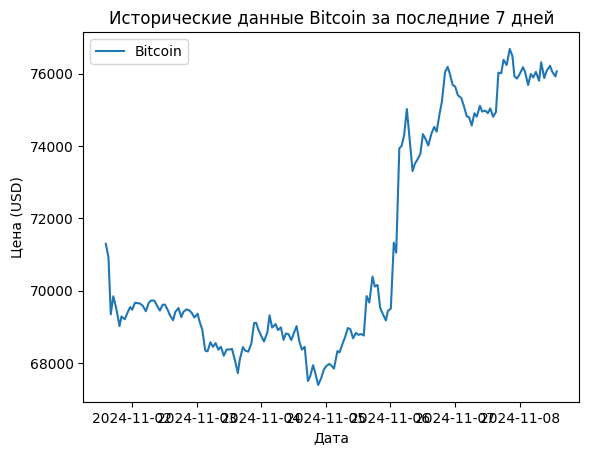


1. Добавить криптовалюту в портфель
2. Удалить криптовалюту из портфеля
3. Показать общую стоимость портфеля
4. Показать изменения цены за последние 24 часа
5. Показать исторические данные о цене
6. Выйти


KeyboardInterrupt: Interrupted by user

In [ ]:

:(

# Дополнительно: Задание 4

Задание 4: Проектное

Вам необходимо самостоятельно найти откртое API предоставляющее информацию в открытом доступе и реализовать собственный проект!


Критерии приемки результата:

- Проект включает в себя не менее 5 возможостей для пользователя
- Проект позволяет использовать все возможности проекта пользователю при помощи взаимодействия через коммандную строку
- Проект работает с открытым API (это значит что при проверке вашей работы преподавателем, преподавателю необходимо просто запустить ячейку с кодом вашего проекта и она будет работать без дополнительных манипуляции)
- Проект должен обязательно включать в себя ряд используемых конструкции:
    - Функции
    - Условные конструкции
    - Ввод/вывод
    - Словари/Списки
- Допускается использование библиотек:
    - requests
    - datetime
    - random

**Здесь добавьте описание вашего проекта**

In [ ]:
import requests
import json
import time
import base64
from PIL import Image
from io import BytesIO

# Укажите свои ключи API
api_key = "F50C19CA55F243599405B12979FBF0B4"
secret_key = "2F8F9AAEDA0CF106DD1A1DA95A5598B4"

class Text2ImageAPI:
    def __init__(self, url, api_key, secret_key):
        self.URL = url
        self.AUTH_HEADERS = {
            'X-Key': f'Key {api_key}',
            'X-Secret': f'Secret {secret_key}',
        }

    def get_model(self):
        response = requests.get(self.URL + 'key/api/v1/models', headers=self.AUTH_HEADERS)
        data = response.json()
        if response.status_code == 200 and data:
            return data[0]['id']
        else:
            raise Exception("Failed to get model ID")

    def generate(self, prompt, model, images=1, width=1024, height=1024):
        params = {
            "type": "GENERATE",
            "numImages": images,
            "width": width,
            "height": height,
            "generateParams": {
                "query": prompt
            }
        }

        data = {
            'model_id': (None, model),
            'params': (None, json.dumps(params), 'application/json')
        }

        response = requests.post(self.URL + 'key/api/v1/text2image/run', headers=self.AUTH_HEADERS, files=data)

        if response.status_code == 201:
            data = response.json()
            return data.get('uuid')  # Получаем UUID генерации
        else:
            raise Exception(f"Failed to generate image: {response.text}")

    def check_generation(self, request_id, attempts=10, delay=10):
        while attempts > 0:
            response = requests.get(self.URL + 'key/api/v1/text2image/status/' + request_id, headers=self.AUTH_HEADERS)
            if response.status_code == 200:
                data = response.json()
                if data['status'] == 'DONE':
                    return data['images']
                elif data['status'] in ['INITIAL', 'PROCESSING']:
                    time.sleep(delay)
            else:
                raise Exception("Failed to check generation status")

            attempts -= 1

        raise Exception("Generation timed out")

def display_image(image_data):
    # Декодируем строку Base64
    image_bytes = base64.b64decode(image_data)
    # Создаем изображение из байтов
    image = Image.open(BytesIO(image_bytes))
    image.show()  # Открывает изображение в новом окне

if __name__ == '__main__':
    api = Text2ImageAPI('https://api-key.fusionbrain.ai/', "F50C19CA55F243599405B12979FBF0B4", "2F8F9AAEDA0CF106DD1A1DA95A5598B4")

    try:
        # Получаем описание изображения от пользователя
        description = input("Введите описание изображения: ")

        # Получаем ID модели
        model_id = api.get_model()

        # Генерируем изображение
        uuid = api.generate(description, model_id)
        images = api.check_generation(uuid)

        # Отображаем каждое сгенерированное изображение
        for image_data in images:
            display_image(image_data)

    except Exception as e:
        print(f"Ошибка: {e}")



Введите описание изображения: кот с кепкой
